# Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats

# Feature overview:

In [2]:
dic=pd.read_excel('Data_Dictionary.xlsx')
dic=dic.set_index('Variable')
dic

,Description
Variable,
id,Unique ID for every Customer
account_type,Account Type – current or saving
gender,Gender of customer
age,Age of customer
region_code,Code assigned to region of residence (has order)
cc_cons_apr,Credit card spend in April
dc_cons_apr,Debit card spend in April
cc_cons_may,Credit card spend in May
dc_cons_may,Debit card spend in May


# Data Loading And Cleaning

In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.


In [3]:
data_train=pd.read_csv('train.csv').set_index('ID')

In [4]:
data_train.head()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,12.0,...,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,31.0,...,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,23.0,...,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,17.0,...,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,32.0,...,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [5]:
data_train.describe()

,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.000000,15000.000000,6387.000000,7153.000000,5334.000000,13915.000000,14470.000000,14256.000000,6387.000000,7153.000000,...,1.352200e+04,14115.000000,14115.000000,1.352200e+04,1.405200e+04,1.432900e+04,14343.000000,14342.000000,1.432900e+04,15000.000000
mean,35.821400,556.877333,10923.114017,23528.110831,9118.916767,9.063600,9.493020,19.186518,5.285110,6.405704,...,5.693594e+05,4.118030,14.028339,3.241828e+05,1.003265e+06,9.867396e+05,5.861954,16.176823,3.260935e+05,12268.175133
std,8.375531,192.645289,11056.411334,16522.533692,9933.749457,8.451949,9.062888,12.310610,6.198838,7.525355,...,3.807421e+05,4.011986,11.533652,2.226731e+05,6.187201e+05,6.083321e+05,4.857434,13.648530,2.016090e+05,11847.712240
min,22.000000,129.000000,15.615941,21.929843,31.457671,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.306745e+01,0.000000,0.000000,2.650332e+01,6.810641e+01,3.941829e+01,0.000000,0.000000,2.550365e+01,0.000000
25%,30.000000,450.750000,4832.873529,11160.115609,3923.840414,3.000000,3.000000,10.000000,1.000000,2.000000,...,2.848119e+05,2.000000,6.000000,1.592213e+05,4.986986e+05,4.943571e+05,3.000000,6.000000,1.607323e+05,5435.000000
50%,34.000000,566.000000,9704.319537,22829.797859,7930.919138,7.000000,7.000000,18.000000,3.000000,4.000000,...,5.652102e+05,3.000000,11.000000,3.219137e+05,1.004250e+06,9.741022e+05,5.000000,13.000000,3.233262e+05,10810.000000
75%,39.000000,710.000000,14710.421644,34492.057737,12004.033689,12.000000,13.000000,27.000000,7.000000,8.000000,...,8.489730e+05,5.000000,19.000000,4.821599e+05,1.493722e+06,1.476865e+06,7.000000,22.000000,4.861349e+05,16394.000000
max,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,62.000000,71.000000,...,2.137043e+07,71.000000,171.000000,1.276041e+07,2.737828e+07,2.589564e+07,94.000000,162.000000,3.147874e+06,237021.000000


In [6]:
data_train.age.value_counts()

33     1006
31      982
32      979
34      959
30      915
35      868
36      839
29      796
28      706
37      698
38      648
39      563
27      524
40      503
41      441
26      403
42      354
43      326
44      269
45      235
25      232
46      196
47      186
48      153
24      138
49      128
50      111
51       98
53       79
52       77
54       68
55       60
23       57
57       51
60       45
56       43
59       37
58       31
61       30
63       28
62       28
64       23
67       18
65       16
22       16
66       14
68        9
70        3
69        3
221       2
223       2
120       1
121       1
220       1
124       1
Name: age, dtype: int64

In [7]:
data_train=data_train.drop(data_train[data_train.age>70].index)

In [8]:
data_types=pd.DataFrame(data_train.dtypes,columns=['data_types'])
data_types


,data_types
account_type,object
gender,object
age,int64
region_code,float64
dc_cons_apr,float64
dc_cons_may,float64
dc_cons_jun,float64
cc_count_apr,float64
cc_count_may,float64
cc_count_jun,float64


Null Value Treatment:-

In [9]:
null=pd.DataFrame(((data_train.isna().sum()/data_train.shape[0])*100),columns=['Null_value(%)'])
train_null=round(null,2)
train_null=train_null[train_null.apply(lambda x:x>0)].dropna()
train_null

,Null_value(%)
dc_cons_apr,57.40
dc_cons_may,52.31
dc_cons_jun,64.43
cc_count_apr,7.22
cc_count_may,3.54
cc_count_jun,4.96
dc_count_apr,57.40
dc_count_may,52.31
dc_count_jun,47.39
card_lim,0.06


In [10]:
#Null with discription
null_d=pd.concat([train_null,dic,data_types],axis=1).dropna()
null_d

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Null_value(%),Description,data_types
card_lim,0.06,Maximum Credit Card Limit allocated,float64
cc_count_apr,7.22,Number of credit card transactions in April,float64
cc_count_jun,4.96,Number of credit card transactions in June,float64
cc_count_may,3.54,Number of credit card transactions in May,float64
credit_amount_apr,9.91,Total amount credited for April,float64
credit_amount_jun,4.48,Total amount credited for June,float64
credit_amount_may,9.85,Total amount credited for May,float64
credit_count_apr,5.17,Total number of times amount credited in april,float64
credit_count_jun,4.38,Total number of times amount credited in June,float64
credit_count_may,5.89,Total number of times amount credited in May,float64


From above discription and data types there is only one categorical feature(loan_enq) which has null valueand fill with "N". One numerical feature which have to fill nan value with mean of that feature.
Rest are fill with 0 .

In [11]:
data_train['loan_enq']=data_train['loan_enq'].fillna('N')

In [12]:
data_train['card_lim']=data_train['card_lim'].fillna(data_train['card_lim'].mean())

In [13]:
data_train=data_train.fillna(0)

In [14]:
data_train.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
dc_cons_apr              0
dc_cons_may              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

#  Removing skewness


In [15]:
data_train.columns

Index(['account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'cc_cons'],
      dtype='object')

In [16]:
cat_data=['account_type', 'gender','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq','region_code']
numeric_data=set(data_train.columns)-set(cat_data)

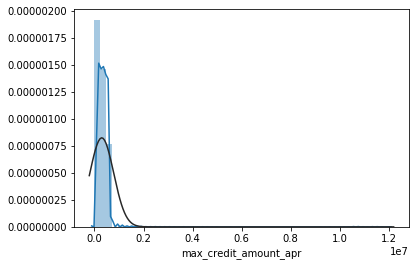

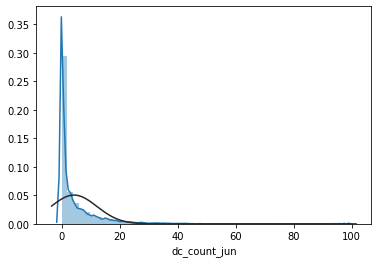

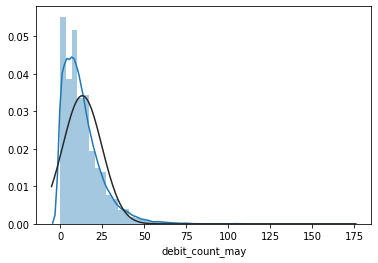

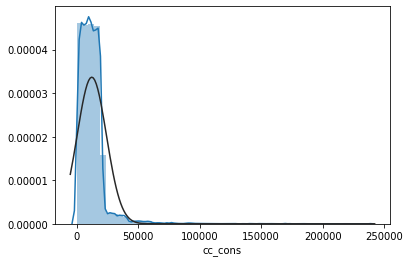

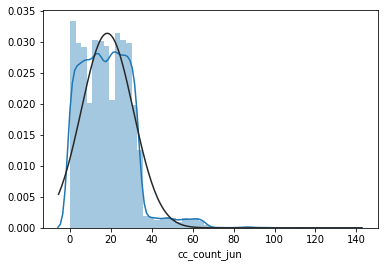

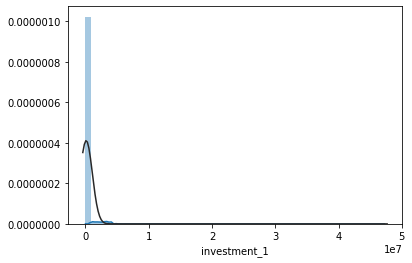

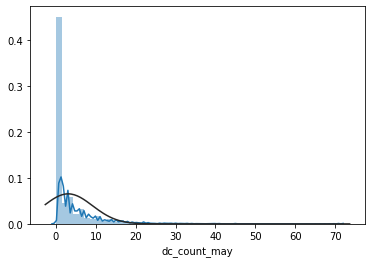

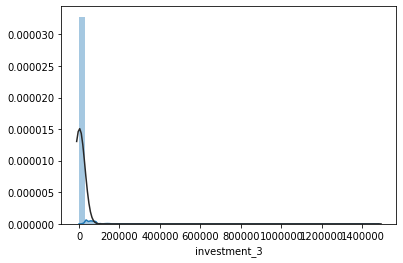

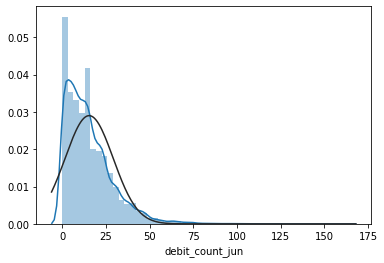

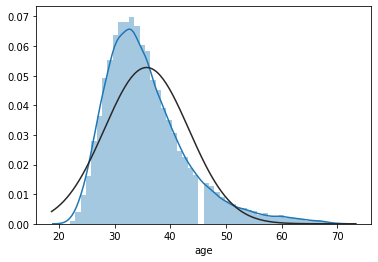

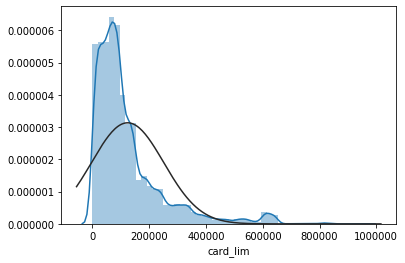

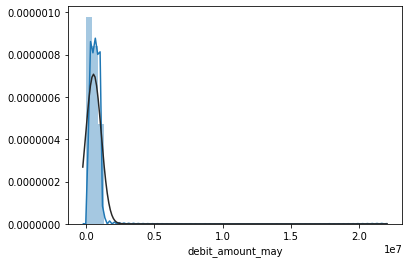

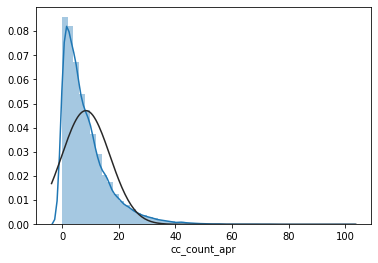

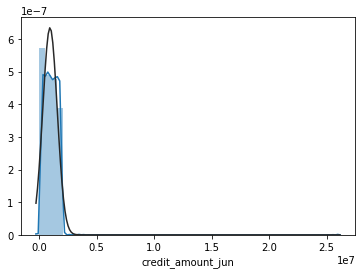

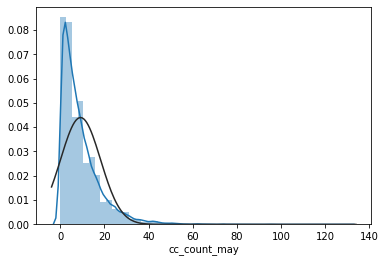

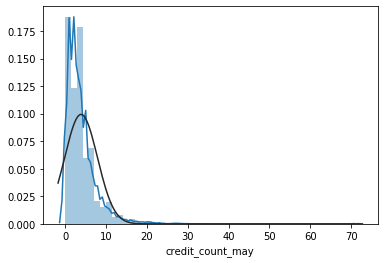

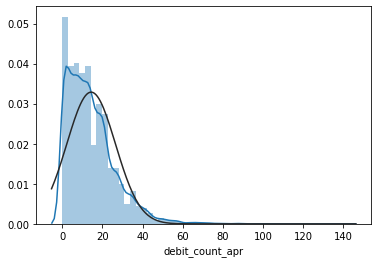

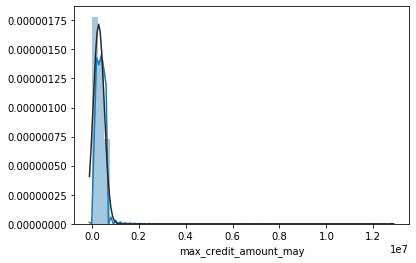

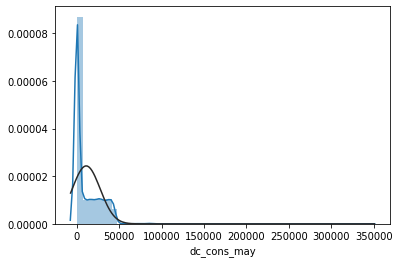

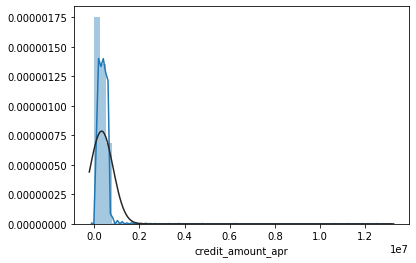

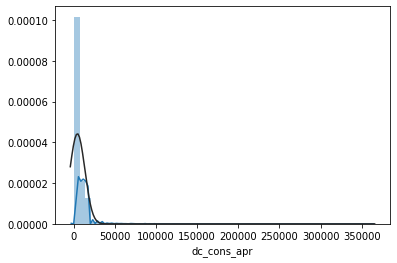

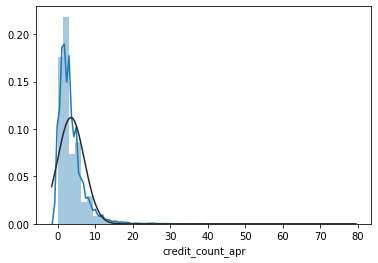

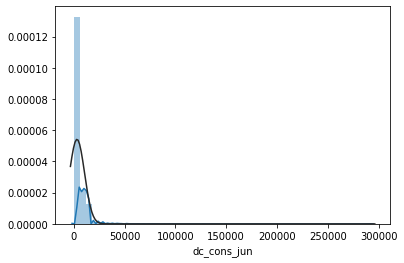

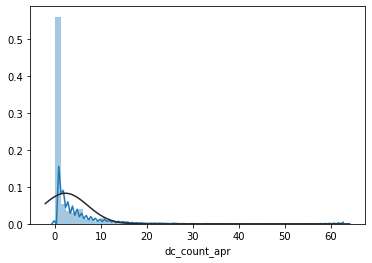

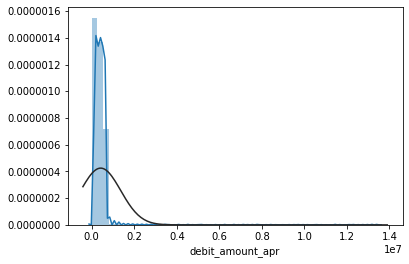

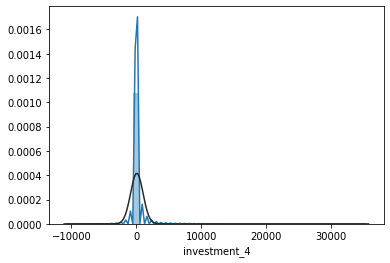

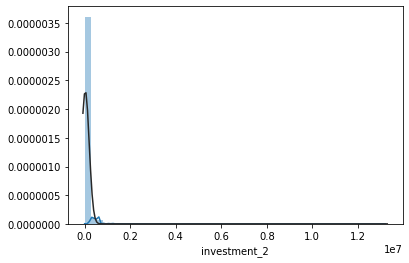

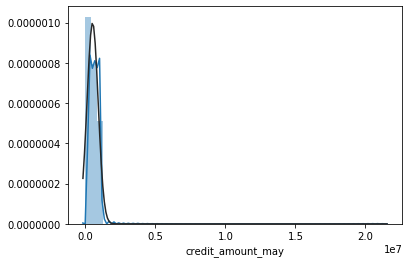

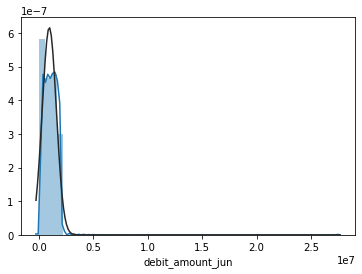

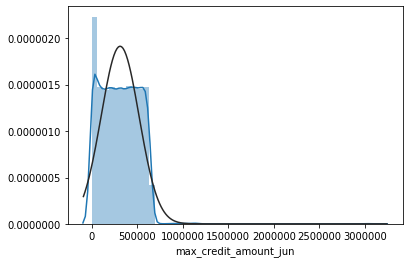

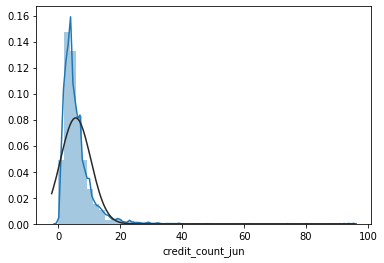

In [17]:
for col in numeric_data:
    sns.distplot(data_train[col],fit=norm)
    plt.xlabel(col)
    plt.show()
    

In [18]:
data_train[numeric_data].skew()

max_credit_amount_apr    16.294925
dc_count_jun              3.412603
debit_count_may           1.902081
cc_cons                   5.630023
cc_count_jun              1.128655
investment_1             26.420406
dc_count_may              3.685186
investment_3             36.741211
debit_count_jun           1.825422
age                       1.220237
card_lim                  2.249392
debit_amount_may         18.904068
cc_count_apr              2.184322
credit_amount_jun         4.243053
cc_count_may              2.308910
credit_count_may          3.976661
debit_count_apr           1.612384
max_credit_amount_may    11.083406
dc_cons_may               2.990324
credit_amount_apr        15.048115
dc_cons_apr               8.501505
credit_count_apr          3.491157
dc_cons_jun               9.270742
dc_count_apr              4.109327
debit_amount_apr          9.823798
investment_4             16.502981
investment_2             34.615087
credit_amount_may         9.850846
debit_amount_jun    

In [19]:
for col in numeric_data:
    data_train[col]=np.log1p(data_train[col])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [20]:
data_train=data_train.drop('region_code',axis=1)

In [21]:
data_train[numeric_data].skew()

max_credit_amount_apr   -2.399514
dc_count_jun             0.793770
debit_count_may         -0.720221
cc_cons                 -1.614317
cc_count_jun            -1.236897
investment_1             4.563858
dc_count_may             1.000220
investment_3             4.677341
debit_count_jun         -0.740353
age                      0.610717
card_lim                -1.152053
debit_amount_may        -3.039415
cc_count_apr            -0.259201
credit_amount_jun       -3.708499
cc_count_may            -0.166748
credit_count_may        -0.019215
debit_count_apr         -0.820903
max_credit_amount_may   -2.414451
dc_cons_may              0.144745
credit_amount_apr       -2.395802
dc_cons_apr              0.359311
credit_count_apr        -0.035686
dc_cons_jun              0.661424
dc_count_apr             1.203885
debit_amount_apr        -3.528655
investment_4             9.725593
investment_2             3.318579
credit_amount_may       -2.442514
debit_amount_jun        -3.163983
max_credit_amo

In [22]:
# our target value is highly skew 
#target=data_train.iloc[:,-1]

In [23]:
#q_upper=data_train.iloc[:,-1].quantile(0.95)
#q_lower=data_train.iloc[:,-1].quantile(0.05)

In [24]:
#new_target=((data_train.iloc[:,-1]>=q_lower) & (data_train.iloc[:,-1]<=q_upper))



In [25]:
 #data_train=data_train[new_target]

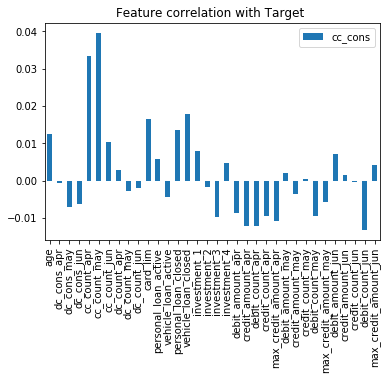

<Figure size 2160x1440 with 0 Axes>

In [26]:
corr=pd.DataFrame(data_train.corr()['cc_cons'].drop('cc_cons'))
corr.plot(kind='bar')
plt.title('Feature correlation with Target ')
plt.figure(figsize=(30,20))
plt.show()

# Encoding for cat data

In [27]:
cat_data=data_train.select_dtypes(include='object').columns
cat_data

Index(['account_type', 'gender', 'loan_enq'], dtype='object')

In [28]:

lab=LabelEncoder()

In [29]:
for col in cat_data:
    data_train[col]=lab.fit_transform(data_train[col])
    

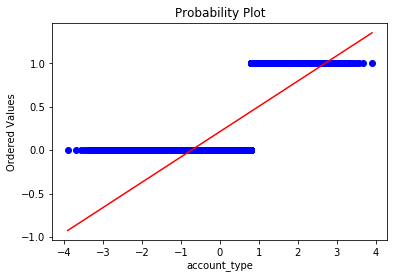

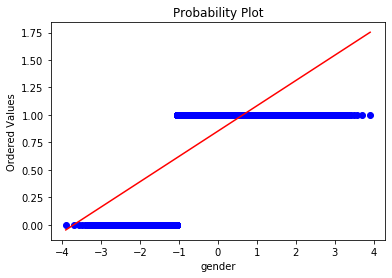

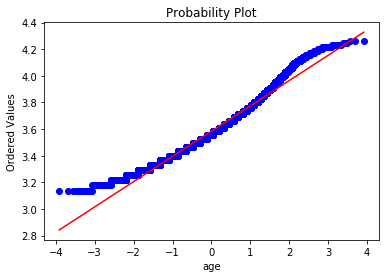

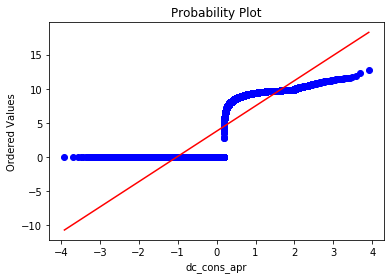

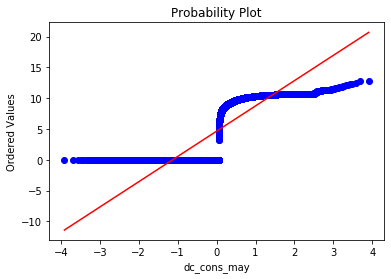

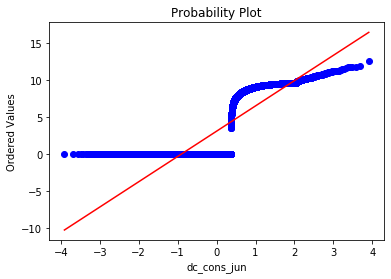

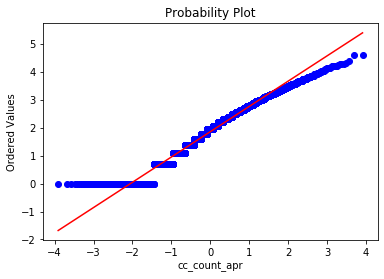

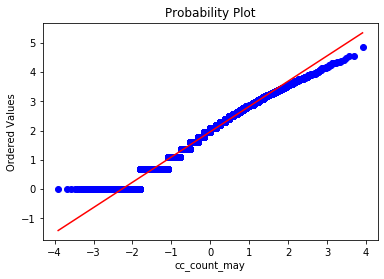

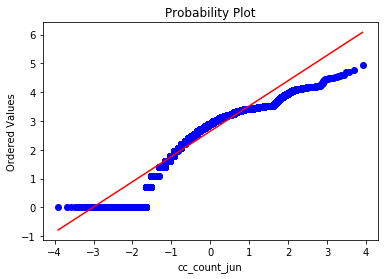

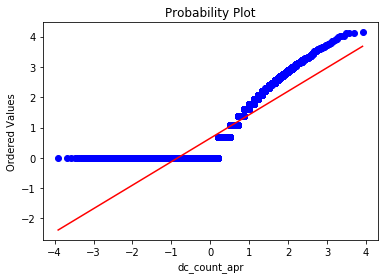

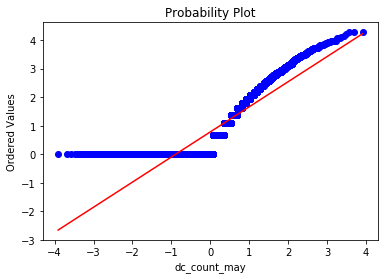

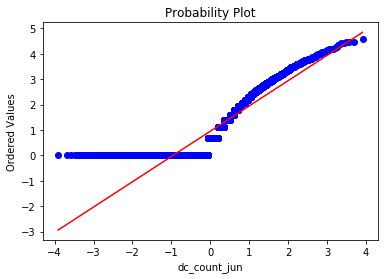

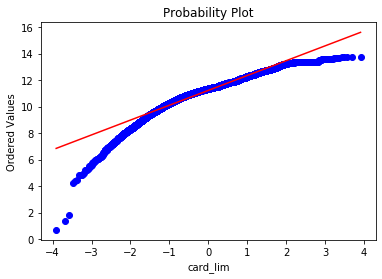

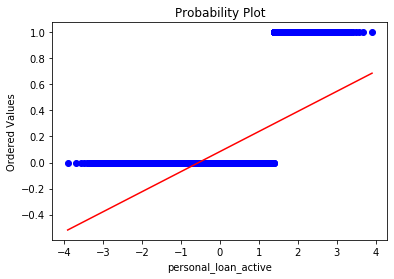

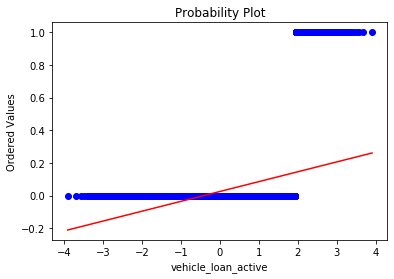

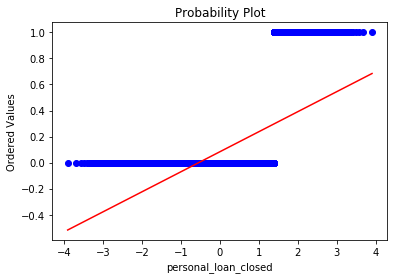

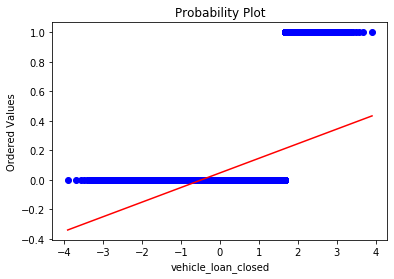

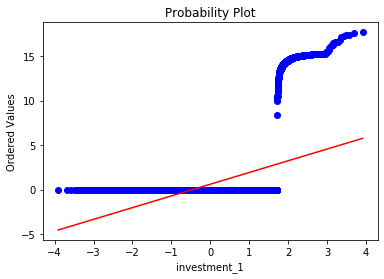

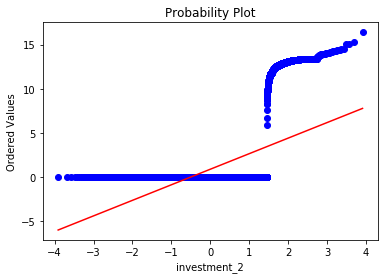

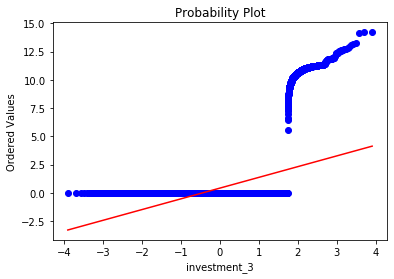

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


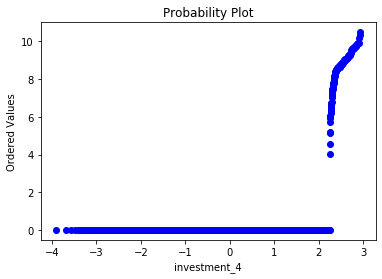

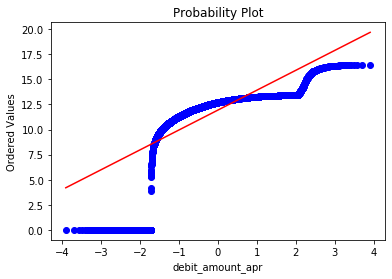

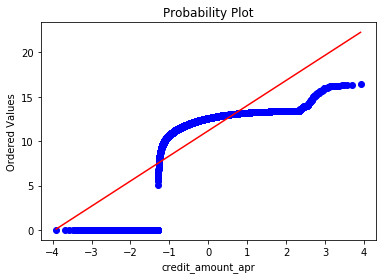

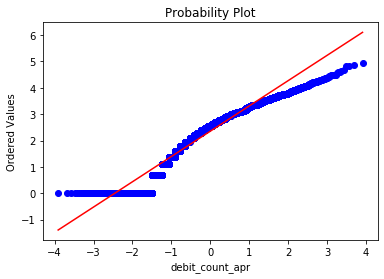

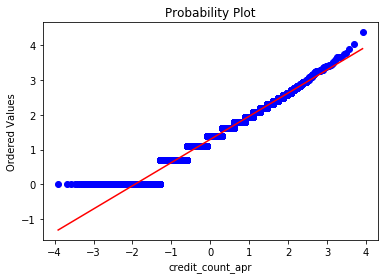

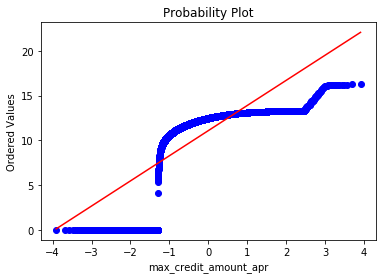

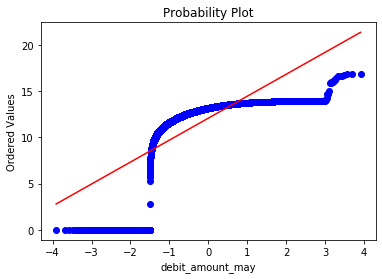

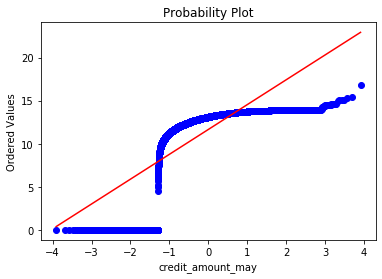

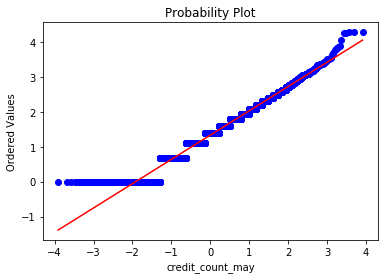

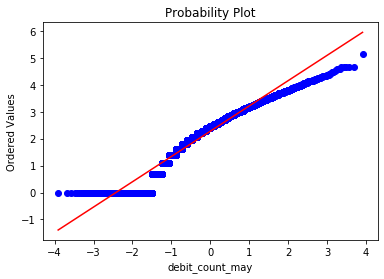

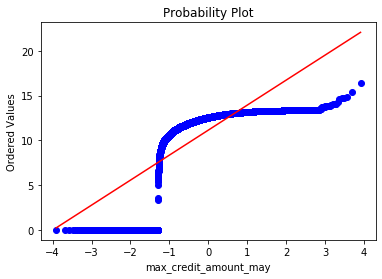

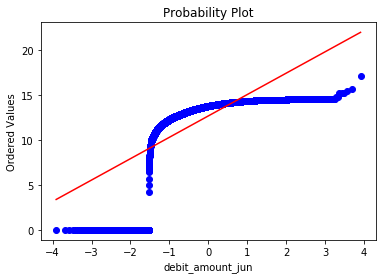

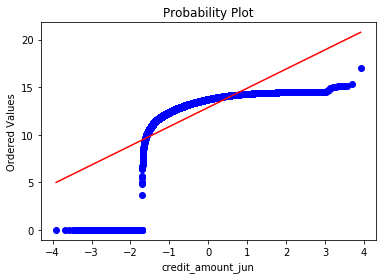

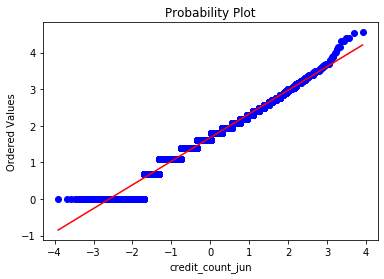

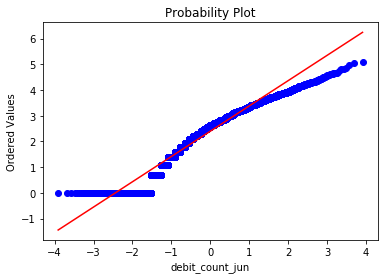

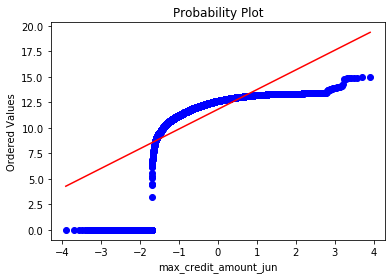

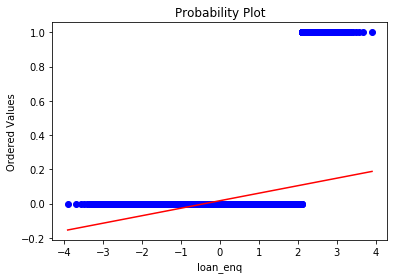

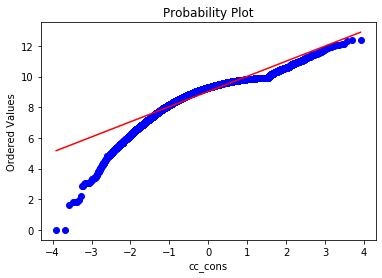

In [30]:
for col in data_train.columns:
    stats.probplot(data_train[col], plot=plt)
    plt.xlabel(col)
    plt.show()


In [31]:
numeric=set(data_train.columns)-set(cat_data)
outlier=data_train[numeric]

In [32]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.2],inclusive=(True, True))
    return dataframe    


outlier = treat_outliers(outlier)

# # Checking for outliers after applying winsorization


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
data_train.shape

(14992, 38)

In [34]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data_train)

,Feature,Number of Outliers
0,account_type,3199
1,gender,2203
2,age,285
3,dc_cons_apr,0
4,dc_cons_may,0
5,dc_cons_jun,0
6,cc_count_apr,0
7,cc_count_may,9
8,cc_count_jun,744
9,dc_count_apr,473


In [35]:
# cata=data_train[cat_data]
# cata=cata.reset_index().drop('ID',axis=1)

In [36]:
# minmax=MinMaxScaler()
# minmax.fit(outlier)

In [37]:
# data_train_scale=pd.DataFrame(minmax.transform(outlier),columns=numeric)
# data_train_scale

In [38]:
# merge_data=pd.concat([data_train_scale,cata],axis=1)
# merge_data.head()

In [39]:
data_train.isna().sum()

account_type              0
gender                    0
age                       0
dc_cons_apr               0
dc_cons_may               0
dc_cons_jun               0
cc_count_apr              0
cc_count_may              0
cc_count_jun              0
dc_count_apr              0
dc_count_may              0
dc_count_jun              0
card_lim                  0
personal_loan_active      0
vehicle_loan_active       0
personal_loan_closed      0
vehicle_loan_closed       0
investment_1              0
investment_2              0
investment_3              0
investment_4             24
debit_amount_apr          0
credit_amount_apr         0
debit_count_apr           0
credit_count_apr          0
max_credit_amount_apr     0
debit_amount_may          0
credit_amount_may         0
credit_count_may          0
debit_count_may           0
max_credit_amount_may     0
debit_amount_jun          0
credit_amount_jun         0
credit_count_jun          0
debit_count_jun           0
max_credit_amount_ju

In [40]:
data_train=data_train.drop('investment_4',axis=1)

# split the data in train test ,train  the model

In [41]:
y=data_train['cc_cons']
X=data_train.drop('cc_cons',axis=1)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_train)
    mse=mean_squared_log_error(np.exp(y_train),y)
    r2=r2_score(y_train,y)
    return (mse,r2)

In [44]:
model(LinearRegression,X_train,X_test,y_train,y_test)


(0.01452778960399678, 0.005118388264024332)

In [45]:
model(Lasso,X_train,X_test,y_train,y_test)

(0.014592264814011605, 0.0)

In [46]:
model(Ridge,X_train,X_test,y_train,y_test)

(0.014527793518418151, 0.005118380695038005)

In [47]:
 mod2=RandomForestRegressor(random_state=0)

In [48]:
mod2.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [49]:
mod2.score(X_test,y_test)

-0.14251879990338834